# 개요

[모두를 위한 딥러닝 - Deep Reinforcement Learning, Sung Kim] 강의 내 코드 정리

# Frozen Lake World

In [ ]:
import gym

In [ ]:
# env = gym.make("Taxi-v3") # 환경 만듦
# observation = env.reset() # 환경 초기화
# for _ in range(1000):
#   env.render() # 환경을 화면으로 출력
#   action = env.action_space.sample() # your action here
#   observation, reward, done, info = env.step(action) 
#   # done: 게임이 끝이 났는지 아닌지
#   # info: 기타 정보

# OpenAI Gym

In [ ]:
import tensorflow
import gym
from gym.envs.registration import register
import sys, tty, termios # mac
# import msvcrt # window

In [ ]:
# 키보드 입력받기
class _Getch:
  def __call__(self):
    fd = sys.stdin.fileno()
    old_settings = termios.tcgetattr(fd)
    try:
      tty.setraw(sys.stdin.fileno())
      ch = sys.stdin.read(3)
    finally:
      termios.tcsetattr(fd, termios.TCSADRAIN, old_settings)
    return ch

In [ ]:
# MACROS
LEFT = 0
DOWN = 1
RIGHT = 2
UP = 3

# Key mapping
arrow_keys = {
    b'H' : UP,
    b'P' : DOWN,
    b'M' : RIGHT,
    b'K' : LEFT}

In [ ]:
# 게임 만들기
register(id='FrozenLake-v3',
         entry_point='gym.envs.toy_text:FrozenLakeEnv',
         kwargs={'map_name':'4x4', 
                 'is_slippery':False})
envs = gym.make('FrozenLake-v3')
envs.render()

inkey = _Getch()

while True:
  key = inkey
  if key not in arrow_keys.keys():
    print('Game aborted')
    break
  
  action = arrow_keys[key]
  state, reward, done, info = env.step(action)
  env.render()
  print('State: ', state, 'Action: ', action, 'Reward: ', reward, 'Info: ', info)

  if done:
    print('Finished with reward',reward)
    break


SFFF
FHFH
FFFH
HFFG
Game aborted


# Lecture 3: Dummy Q-learning (table)

Frozen Lake 예제 16 state, 4 action

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

In [ ]:
def rargmax(vector):
  m = np.amax(vector)
  indices = np.nonzero(vector==m)[0]
  return pr.choice(indices)

In [ ]:
register(id = 'FrozenLake-v3',
         entry_point = 'gym.envs.toy_text:FrozenLakeEnv',
         kwargs={'map_name':'4x4',
                 'is_slippery':False})
env = gym.make('FrozenLake-v3')

In [ ]:
[env.observation_space.n, env.action_space.n]

[16, 4]

In [ ]:
Q = np.zeros([env.observation_space.n, env.action_space.n])
num_episodes = 2000

rList = []
for i in range(num_episodes):
  state = env.reset()
  rAll = 0
  done = False

  while not done:
    action = rargmax(Q[state,:])
    new_state, reward, done,_ = env.step(action)
    Q[state, action] = reward + np.max(Q[new_state,:])
    
    rAll += reward
    state = new_state
  rList.append(rAll)

Success rate:  0.9395
Final Q-table Values
Left Down Right Up
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]


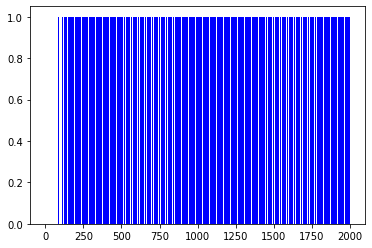

In [ ]:
print('Success rate: ', str(sum(rList)/num_episodes))
print("Final Q-table Values")
print('Left Down Right Up')
print(Q)
plt.bar(range(len(rList)), rList, color="blue") # 언제 성공했는지 그래프
plt.show()

# Lecture 4: Q-learning exploit&exploration and discounted reward

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

In [ ]:
register(id = 'FrozenLake-v3',
         entry_point = 'gym.envs.toy_text:FrozenLakeEnv',
         kwargs={'map_name':'4x4',
                 'is_slippery':False})
env = gym.make('FrozenLake-v3')

In [ ]:
Q = np.zeros([env.observation_space.n, env.action_space.n])
dis = 0.99 # discount rate
num_episodes = 2000

In [ ]:
rList = []
for i in range(num_episodes):
  state = env.reset()
  rAll = 0
  done = False

  while not done:
    # noise가 있는 Q table에서 새 action 선택
    action = np.argmax(Q[state, :]+ np.random.randn(1, env.action_space.n) / (i+1))
    
    new_state, reward, done, _ = env.step(action)
    Q[state, action] = reward + dis * np.max(Q[new_state, :])

    rAll += reward
    state = new_state
  
  rList.append(rAll)

Success rate: 0.9685
Final Q_table
[[0.         0.         0.95099005 0.        ]
 [0.         0.         0.96059601 0.        ]
 [0.         0.970299   0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.99       0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.         0.         0.        ]]


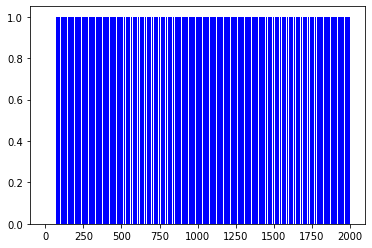

In [ ]:
print("Success rate: " + str(sum(rList)/num_episodes))
print("Final Q_table")
print(Q) # discount가 반영된 Q value
plt.bar(range(len(rList)), rList, color="blue")
plt.show()

## Code: e-greedy

In [ ]:
rList = []
for i in range(num_episodes):
  state = env.reset()
  rAll = 0
  done = False

  # e-greedy
  e = 1./((i//100)+1)

  while not done:
    # 랜덤하게 action 선택 or Q 테이블에 의거해 선택
    if np.random.rand(1)<e:
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state,:])

    new_state, reward, done, _ = env.step(action)
    Q[state, action] = reward + dis * np.max(Q[new_state, :])

    rAll += reward
    state = new_state
  
  rList.append(rAll)

Success rate: 0.815
Final Q_table
[[0.94148015 0.95099005 0.95099005 0.94148015]
 [0.94148015 0.         0.96059601 0.95099005]
 [0.95099005 0.970299   0.95099005 0.96059601]
 [0.96059601 0.         0.95099005 0.95099005]
 [0.95099005 0.96059601 0.         0.94148015]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.         0.96059601]
 [0.         0.         0.         0.        ]
 [0.96059601 0.         0.970299   0.95099005]
 [0.96059601 0.9801     0.9801     0.        ]
 [0.970299   0.99       0.         0.970299  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.99       0.970299  ]
 [0.9801     0.99       1.         0.9801    ]
 [0.         0.         0.         0.        ]]


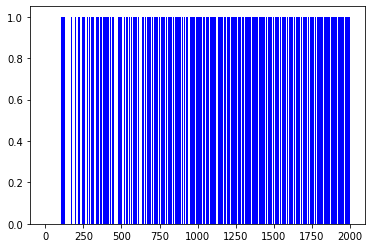

In [ ]:
print("Success rate: " + str(sum(rList)/num_episodes))
print("Final Q_table")
print(Q) # Q value 보면 위의 시도보다 여러 곳 탐색했음을 알 수 있음(reward가 0이 아닌 곳이 더 많음)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()

# Lecture 5. Q-learning in non-deterministic world

In [ ]:
# !pip install readchar
import tensorflow
import gym
from gym.envs.registration import register
import sys, tty, termios # mac
import readchar
# import msvcrt # window

In [ ]:
## 다음 .py 저장 후 터미널 실행, 코드 mac 기준

LEFT = 0
DOWN = 1
RIGHT = 2
UP = 3

arrow_keys = { '\x1b[A': UP, '\x1b[B': DOWN, '\x1b[C': RIGHT, '\x1b[D': LEFT }

register(
  id='FrozenLake-v3',
  entry_point='gym.envs.toy_text:FrozenLakeEnv',
  kwargs={'map_name': '4x4', 'is_slippery': False} # is_slippery가 False면 deterministic world
)

env = gym.make('FrozenLake-v3')
env.render()

while True:
  key = readchar.readkey() ### error: (25, 'Inappropriate ioctl for device')
  if key not in arrow_keys.keys():
    print(arrow_keys[key])
    print("Game aborted!")
    break

  action = arrow_keys[key]
  state, reward, done, info = env.step(action)
  env.render()
  print("State: ", state, "Action: ", action, "Reward: ", reward, "Info: ", info)

  if done:
    print('Finished with reward', reward)
    break

non-deterministic 예제

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

In [ ]:
Q = np.zeros([env.observation_space.n, env.action_space.n])
dis = 0.99 # discount rate
num_episodes = 2000

env = gym.make('FrozenLake-v0') # slipperyt game -> non-deterministic

rList = []
for i in range(num_episodes):
  state = env.reset()
  rAll = 0
  done = False

  # e-greedy
  e = 1./((i//100)+1)

  while not done:
    if np.random.rand(1)<e:
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state,:])

    new_state, reward, done, _ = env.step(action)
    Q[state, action] = reward + dis * np.max(Q[new_state, :])

    rAll += reward
    state = new_state
  
  rList.append(rAll)

Success rate: 0.009
Final Q_table
[[0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.87752102 0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.94148015 0.         0.        ]
 [0.         0.         0.         0.        ]]


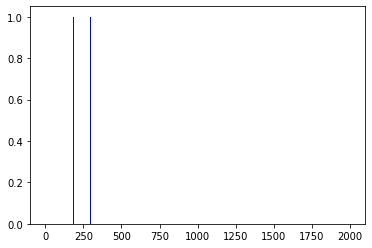

In [ ]:
print("Success rate: " + str(sum(rList)/num_episodes)) # 성공률이 매우 낮음
print("Final Q_table")
print(Q) 
plt.bar(range(len(rList)), rList, color="blue")
plt.show()

learning rate 도입, Q 학습 정보를 learning rate 가중치 만큼만 믿음

In [ ]:
Q = np.zeros([env.observation_space.n, env.action_space.n])
dis = 0.99 # discount rate
num_episodes = 2000

learning_rate = 0.45 # Q table 정보를 일부만 반영, 값이 크면 빨리 학습

env = gym.make('FrozenLake-v0') # slipperyt game -> non-deterministic

rList = []
for i in range(num_episodes):
  state = env.reset()
  rAll = 0
  done = False

  # e-greedy
  e = 1./((i//100)+1)

  while not done:
    if np.random.rand(1)<e:
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state,:])

    new_state, reward, done, _ = env.step(action)
    # learning rate 도입
    Q[state, action] = (1-learning_rate) * Q[state, action] + \
    learning_rate *( reward + dis * np.max(Q[new_state, :]) )

    rAll += reward
    state = new_state
  
  rList.append(rAll)

Success rate: 0.2715
Final Q_table
[[0.65358589 0.56252258 0.564949   0.56654374]
 [0.23133539 0.12338685 0.222748   0.58280998]
 [0.2570949  0.30964127 0.37279393 0.52040845]
 [0.33703648 0.23051994 0.15721716 0.42320441]
 [0.68242073 0.29140067 0.45453912 0.42096803]
 [0.         0.         0.         0.        ]
 [0.56053307 0.09818993 0.07357101 0.08973779]
 [0.         0.         0.         0.        ]
 [0.3032047  0.28958873 0.33174094 0.72942679]
 [0.31836797 0.76452388 0.39190271 0.25435975]
 [0.82223598 0.40630396 0.12317804 0.48086703]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.65030512 0.43794357 0.80659741 0.15143703]
 [0.76031525 0.90466609 0.73980411 0.73367736]
 [0.         0.         0.         0.        ]]


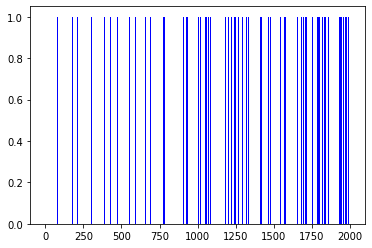

In [ ]:
print("Success rate: " + str(sum(rList)/num_episodes)) # ㅣlearning rate 도입 전보다 성공률이 상승
print("Final Q_table")
print(Q) 
# 후반 loop로 갈수록 성공률 높아짐
plt.bar(range(len(rList)), rList, color="blue")
plt.show()

# Lecture 6: Q-Network

## Q Network for Frozen Lake

- Q network를 이용해 Q value 추정하기
- tensorflow ver1 기준으로 작성

In [ ]:
import gym
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
def one_hot(x):
  return np.identity(16)[x:x+1]

In [ ]:
env = gym.make('FrozenLake-v0')

In [ ]:
input_size = env.observation_space.n # 16 (state 수)
output_size = env.action_space.n # 4 (action 수)
learning_rate = 0.1

# action을 선택하는 feed forward part
# tf.placeholder -> 값을 넘겨주는 함수
X = tf.placeholder(shape = [1, input_size], dtype=tf.float32) # ex.[[0,1,0,0,..]] -> 1x16 array
# 초기화 0, 0.01
# tf.Variable은 학습 가능한 값
W = tf.Variable(tf.random_uniform([input_size, output_size], 0, 0.01)) # weight, 16x4 array
Qpred = tf.matmul(X,W) # output Q prediction, 1x4 array

#--- 2차 loss 만들고 loss 최소화하도록 학습
Y = tf.placeholder(shape = [1,output_size], dtype = tf.float32) # Y label, action 별 True Q value
loss = tf.reduce_sum(tf.square(Y-Qpred)) # Gradient Descent Step on (Y-Qs)^2
train = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(loss)

dis = .99
num_episodes = 2000
rList = []

#--- 학습
init  = tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)
  for i in range(num_episodes):
    s = env.reset()
    e = 1./ ((i/50)+1)
    rAll = 0 # 모든 state에서의 리워드 합한 값
    done = False
    local_loss = []

    # 게임이 끝날때까지(done) 실행하되 이전 loop의 Q value가 다음 state에서 구한 Qs와 가까워지도록 학습
    while not done:
      Qs = sess.run(Qpred, feed_dict = {X: one_hot(s)})
      #--- E- greedy로 다음 action 선택하기
      if np.random.rand(1) < e:
        a = env.action_space.sample()
      else:
        a = np.argmax(Qs)
      s1, reward, done, _ = env.step(a)

      #--- update Q
      # Y label 만들기
      if done: # terminal 상태에 도달한 경우
        Qs[0, a] = reward
      else:
        Qs1 = sess.run(Qpred, feed_dict = {X: one_hot(s1)}) # 다음 상태 s1에서 발생 가능한 action 별 Q_value 예측
        # deterministic Q value 이용
        # a(내가 취한 action)만 업데이트
        Qs[0,a] = reward + dis * np.max(Qs1) # Q_value 중 최대인 것 가져와서 reward에 더하기
      # Y와 Qs의 차이가 작아지도록 학습
      sess.run(train, feed_dict = {X: one_hot(s), 
                                  Y: Qs})
      rAll += reward
      s = s1
    #--- while 문 끝
    rList.append(rAll)

Success rate: 0.4185


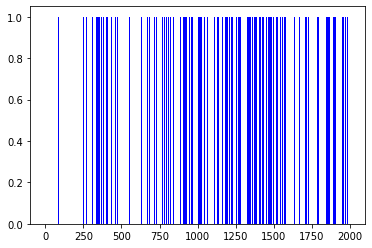

In [ ]:
# 성공률이 Q table보다 떨어짐
print("Success rate: " + str(sum(rList)/num_episodes))
plt.bar(range(len(rList)), rList, color="blue")
plt.show()

## Q Network for Cart Pole

막대를 양쪽으로 움직이되 넘어지지 않고 많이 움직이기

In [ ]:
# !pip install tensorflow==1.14
import gym
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [ ]:
env = gym.make('CartPole-v0')
env.reset()
random_episodes = 0
reward_sum = 0
while random_episodes < 3:
  # env.render() # 화면에 카트가 움직이는 것 보여줌
  action = env.action_space.sample()
  observation, reward, done, _ = env.step(action)
  print(observation, reward, done)
  reward_sum += reward
  if done:
    random_episodes +=1
    print("Reward for this episode was:", reward_sum)
    reward_sum = 0
    env.reset()
    print('--------------------------------------------------------')

# 모든 state에서의 reward는 1, 막대가 넘어지는 경우 Done
# 마지막 행동 done = True에서의 reward도 1이기 때문에 이 부분이 잘못된 행동임을 보여주기 위해 reward 수정
# observation(state) 보면 원핫 인코딩 사용 불가

[ 0.04061689 -0.15757389 -0.02855358  0.26474467] 1.0 False
[ 0.03746542  0.03794373 -0.02325869 -0.03680581] 1.0 False
[ 0.03822429  0.23339135 -0.0239948  -0.3367354 ] 1.0 False
[ 0.04289212  0.42884641 -0.03072951 -0.63688738] 1.0 False
[ 0.05146905  0.62438312 -0.04346726 -0.93908703] 1.0 False
[ 0.06395671  0.42987326 -0.062249   -0.66037317] 1.0 False
[ 0.07255417  0.6258037  -0.07545646 -0.97198899] 1.0 False
[ 0.08507025  0.431771   -0.09489624 -0.70393127] 1.0 False
[ 0.09370567  0.23808328 -0.10897487 -0.44256451] 1.0 False
[ 0.09846733  0.43456491 -0.11782616 -0.76751393] 1.0 False
[ 0.10715863  0.63109478 -0.13317644 -1.09482559] 1.0 False
[ 0.11978053  0.82769526 -0.15507295 -1.42615323] 1.0 False
[ 0.13633443  0.63479204 -0.18359601 -1.18567952] 1.0 False
[ 0.14903027  0.83175749 -0.2073096  -1.52983676] 1.0 False
[ 0.16566542  0.63964975 -0.23790634 -1.30835859] 1.0 True
Reward for this episode was: 15.0
--------------------------------------------------------
[ 0.021951

In [ ]:
learning_rate = 0.1
input_size = env.observation_space.shape[0] # 4 (state 수)
output_size = env.action_space.n # 2 (action 수)

# action을 선택하는 feed forward part
X = tf.placeholder(tf.float32, [None, input_size], name = "input_x") # 차원 크기 None은 1이라고 보면 됨
# 변수 만들기, tf.Variable, tf.get_variable 모두 가능
W1 = tf.get_variable("W1", 
                shape = [input_size, output_size],
                initializer = tf.contrib.layers.xavier_initializer()) # weight
Qpred = tf.matmul(X, W1) # output Q prediction

#--- 2차 loss 만들고 loss 최소화하도록 학습
Y = tf.placeholder(shape = [None,output_size], dtype = tf.float32) # Y label, action 별 True Q value
loss = tf.reduce_sum(tf.square(Y-Qpred)) # Gradient Descent Step on (Y-Qs)^2
# FrozenLake와 다른 옵티마이저 사용해보기, Adam
train = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(loss)

dis = .99
num_episodes = 2000
rList = []

#--- 학습
init  = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for i in range(num_episodes):
  e = 1./ ((i/10)+1)
  step_count = 0 
  s = env.reset()
  done = False

  #--- Q network training
  # 다음 state에서 구한 Qs와 현재 Q value가 가까워지도록 학습
  while not done:
    step_count +=1
    x = np.reshape(s, [1, input_size])
    Qs = sess.run(Qpred, feed_dict = {X: x})
    #--- E- greedy로 다음 action 선택하기
    if np.random.rand(1) < e:
      a = env.action_space.sample()
    else:
      a = np.argmax(Qs)

    s1, reward, done, _ = env.step(a)
    #--- update Q
    # Y label(Qs) 만들기
    if done: # 막대가 넘어짐
      Qs[0, a] = -100 # 넘어지는 상태일 때의 reward 나쁘게 주기
    else:
      x1 = np.reshape(s, [1, input_size])
      Qs1 = sess.run(Qpred, feed_dict = {X: x1}) # 다음 상태 s1에서 발생 가능한 action 별 Q_value 예측
      # deterministic Q value 이용
      # a(내가 취한 action)만 업데이트
      # 1x2 array에서 1번째 차원이 action(Left, Rgiht) -> [0,a] 꼴로 업데이터
      Qs[0,a] = reward + dis * np.max(Qs1) # Q_value 중 최대인 것 가져와서 reward에 더하기
    # Y와 Qs의 차이가 작아지도록 학습
    sess.run(train, feed_dict = {X: x, Y: Qs})
    s = s1
  rList.append(step_count)
  print("Episode {} step: {}".format(i, step_count))
  # 10번 시도 동안 500번 움직이면 성공횄다고 보고 루프 나감
  if len(rList)> 10 and np.mean(rList[-10:]) >500:
    break

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Episode 0 step: 21
Episode 1 step: 18
Episode 2 step: 16
Episode 3 step: 23
Episode 4 step: 26
Episode 5 step: 11
Episode 6 step: 21
Episode 7 step: 28
Episode 8 step: 38
Episode 9 step: 37
Episode 10 step: 32
Episode 11 step: 42
Episode 12 step: 23
Episode 13 step: 32
Episode 14 step: 45
Episode 15 step: 42
Episode 16 step: 45
Episode 17 step: 50
Episode 18 step: 37
Episode 19 step: 56
Episode 20 step: 14
Episode 21 step: 22
Episode 22 step: 69
Episode 23 step: 32
Episode 24 step: 24
Episode 25 step: 16
Episode 26 step: 28
Episode 27 step: 47
Episode 28 step: 24
Episode 29 step: 14
Episode 30 step: 22
Episode 31 step: 22
Episod

- socre가 12밖에 안됨-> 학습 잘 안됨
- W1 파라미터 수가 4밖에 안됨
- 네트워크가 제대로 수렴안함
  - 샘플간 correlation
  - non-stationary target

-> DQN으로 극복

In [ ]:
# 위에서 훈련한 모델이 잘 학습됐는지 확인
# 학습이 잘됐다면 action 오랫동안 지속
observaition = env.reset()
reward_sum = 0 
while True:
  # env.render()

  x = np.reshape(observation, [1, input_size])
  Qs = sess.run(Qpred, feed_dict = {X:x})
  a = np.argmax(Qs)

  observation, reward, done, _ = env.step(a)
  reward_sum += reward
  if done:
    print("Total score: {}".format(reward_sum))
    break

Total score: 12.0


# Lecture 7: DQN

## DQN 1 (NIPS 2013)

- https://github.com/awjuliani/DeepRL-Agents
- https://github.com/devsisters/DQN-tensorflow
- https://github.com/dennybritz/reinforcement-learning/blob/master/DQN/dqn.py

python2 환경에서 import dqn 후 dqn.DQN 사용 <br/>
or <br/>
python3 환경에서 아래 DQN 클래스 사용 <br/>
단, tensorflow는 버전1이어야 함

In [1]:
# !wget https://www.python.org/ftp/python/2.7.11/Python-2.7.11.tgz
# !tar xvfz Python-2.7.11.tgz
# !Python-2.7.11/configure
# !make
# !sudo make install

In [2]:
# !python --version

In [1]:
# !pip install tensorflow==1.14
# !pip install dqn # tensorflow ver2 에서만 동작, 버전 안 바뀔 경우 아래 DQN 클래스 선언
# dqn.DQN -> DQN(유저가 선언한 클래스)
import numpy as np
import tensorflow as tf
import random
# import dqn
from collections import deque

import gym

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
print(tf.__version__)

1.14.0


In [3]:
class DQN:
  def __init__(self, session, input_size, output_size, name="main"):
    self.session = session
    self.input_size = input_size
    self.output_size = output_size
    self.net_name = name

    self._build_network()

  def _build_network(self, h_size = 10, l_rate = 1e-1):
    with tf.variable_scope(self.net_name):
      self._X = tf.placeholder(
          tf.float32, [None, self.input_size], name="input_x")
      
      # First layer of weights
      W1 = tf.get_variable("W1", shape = [self.input_size, h_size],
                           initializer = tf.contrib.layers.xavier_initializer()) 
      layer1 = tf.nn.tanh(tf.matmul(self._X, W1))

      # Second layer of weights
      W2 = tf.get_variable("W2", shape = [h_size, self.output_size],
                           initializer = tf.contrib.layers.xavier_initializer()) 
      self._Qpred = tf.matmul(layer1, W2) # Q는 선형회귀이므로 tf.matmul 결과에 activation 안 함

    # policy를 학습하는 데 필요한 네트워크 정의
    self._Y = tf.placeholder(
        shape = [None, self.output_size], dtype=tf.float32)
    # loss function
    self._loss = tf.reduce_mean(tf.square(self._Y - self._Qpred))
    # learning
    self._train = tf.train.AdamOptimizer(
        learning_rate = l_rate).minimize(self._loss)

  def predict(self, state):
    x = np.reshape(state, [1, self.input_size])
    return self.session.run(self._Qpred, feed_dict = {self._X : x})

  def update(self, x_stack, y_stack):
    return self.session.run([self._loss, self._train], 
                            feed_dict={self._X: x_stack, self._Y : y_stack})

In [4]:
env = gym.make('CartPole-v0')

input_size = env.observation_space.shape[0]
output_size = env.action_space.n

dis = 0.9
REPLAY_MEMORY = 50000

### (1) Go deep(class)

### (2) Replay memory

- Recap
  - 네트워크 만들기(Network Build_ init)
  - 환경 초기화
  - 다음 루프 실행
    - action 가져오기 by E-greedy
    - r, s = env_step(a) -> 버퍼에 저장
  - 버퍼로부터 랜덤 샘플링 -> 네트워크 학습

Train from Replay Buffer

In [5]:
def simple_replay_train(DQN, train_batch):
  x_stack = np.empty(0).reshape(0, DQN.input_size)
  y_stack = np.empty(0).reshape(0, DQN.output_size)

  # Get stored information from the buffer
  for state, action, reward, next_state, done in train_batch:
    Q = DQN.predict(state)
    # terminal?
    if done:
      Q[0, action] = reward
    else:
      # obtain the Q' value by feeding the new state through our network
      Q[0, action] = reward + dis * np.max(DQN.predict(next_state))
    y_stack = np.vstack([y_stack, Q])
    x_stack = np.vstack([x_stack, state])

  # Train our network using target and predicted Q values on each episode
  return DQN.update(x_stack, y_stack) # 여기서 학습

bot_play

In [6]:
def bot_play(mainDQN):
  s = env.reset()
  reward_sum = 0
  while True:
    # env.render()
    # action 랜덤하게 가져오지 않고 state 따른 action으로 가져오기
    a = np.argmax(mainDQN.predict(s)) 
    s, reward, done, _ = env.step(a)
    reward_sum +=reward
    if done:
      print("Total score: {}".format(reward_sum))
      break

학습 결과 확인 <br/>
epsiode(망치가 안 넘어지고 진행)가 1의 자리에서 100의 자리까지 상승(학습 잘 됨)

In [8]:
def main():
  max_episodes = 5000

  # store the previous 
  replay_buffer = deque()

  with tf.Session() as sess:
    mainDQN = DQN(sess, input_size, output_size)
    tf.global_variables_initializer().run()

    for episode in range(max_episodes):
      e = 1./((episode/10)+1)
      done = False
      step_count = 0

      state = env.reset()
      while not done:
        if np.random.rand(1)<e:
          action = env.action_space.sample()
        else:
          # choose an action by greedily from the Q-network
          action = np.argmax(mainDQN.predict(state))
        
        # get new state and reward from environment
        next_state, reward, done, _ = env.step(action)
        if done: # big penalty
          reward = -100
        
        # save the experience to our buffer
        replay_buffer.append((state, action, reward, next_state, done))
        if len(replay_buffer) > REPLAY_MEMORY:
          replay_buffer.popleft()
        
        state = next_state
        step_count +=1
        if step_count > 10000: # good enough
          break
        
        print("Episode: {} step:{}".format(episode, step_count))
        if step_count > 10000:
          pass
        
        if episode % 10 == 1: # train every 10 episodes:
          # Get a random batch of experiences
          for _ in range(50):
            # Minibatch works better
            minibatch = random.sample(replay_buffer, 10)
            loss, _ = simple_replay_train(mainDQN, minibatch)
          print("Loss: ",loss)
      bot_play(mainDQN)

  if __name__ == "main":
    main()

In [8]:
main() # 학습 중도 중단함

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Episode: 1234 step:15
Episode: 1234 step:16
Episode: 1234 step:17
Episode: 1234 step:18
Episode: 1234 step:19
Episode: 1234 step:20
Episode: 1234 step:21
Episode: 1234 step:22
Episode: 1234 step:23
Episode: 1234 step:24
Episode: 1234 step:25
Episode: 1234 step:26
Total score: 24.0
Episode: 1235 step:1
Episode: 1235 step:2
Episode: 1235 step:3
Episode: 1235 step:4
Episode: 1235 step:5
Episode: 1235 step:6
Episode: 1235 step:7
Episode: 1235 step:8
Episode: 1235 step:9
Episode: 1235 step:10
Episode: 1235 step:11
Episode: 1235 step:12
Episode: 1235 step:13
Episode: 1235 step:14
Episode: 1235 step:15
Episode: 1235 step:16
Episode: 1235 step:17
Episode: 1235 step:18
Episode: 1235 step:19
Episode: 1235 step:20
Episode: 1235 step:21
Episode: 1235 step:22
Episode: 1235 step:23
Episode: 1235 step:24
Episode: 1235 step:25
Episode: 1235 step:26
Total score: 35.0
Episode: 1236 step:1
Episode: 1236 step:2
Episode: 1236 step:3
Episode: 1236 step:4
Episode: 1236 ste

KeyboardInterrupt: ignored

## DQN 2 (Nature 2015)

!! DQN 클래스와 main 함수는 DQN1(NIPS 2013)에서 선언한 것 그대로 사용

### (3) Seperate Networks

Create a Target Network

Code 3: replay train (targetDQN added): 
  - mainDQN: $\hat{Q} \sim Q$  되도록 $\theta$ 학습
  - targetDQN: 가장 최근에 구한 $\hat{Q}$으로 target y 계산

In [6]:
def replay_train(mainDQN, targetDQN, train_batch):
  x_stack = np.empty(0).reshape(0, input_size)
  y_stack = np.empty(0).reshape(0, output_size)

  # Get stored information from the buffer
  for state, action, reward, next_state, done in train_batch:
    Q = mainDQN.predict(state) 

    # terminal?
    if done:
      Q[0, action] = reward
    else:
      # get target from target DQN (Q')
      # Q를 추정할 때 사용한 mainDQN 네트워크를 사용하지 않고
      # 별도의 네트워크 targetDQN을 사용하여 현재 state에서의 Q value(y) 구함
      ###################################################################
      Q[0, action] = reward + dis * np.max(targetDQN.predict(next_state))
      ###################################################################

    y_stack = np.vstack([y_stack, Q])
    x_stack = np.vstack([x_stack, state])

  # Train our network using target and predicted Q values on each episode
  return mainDQN.update(x_stack, y_stack)
  

Code 5: network (variable) copy

In [7]:
def bot_play(mainDQN):
  # see our trained network in action
  s = env.reset()
  reward_sum = 0
  while True:
    # env.render()
    a = np.argmax(mainDQN.predict(s))
    s, reward, done, _ = env.step(a)
    reward_sum += reward
    if done:
      print("Total score: {}".format(reward_sum))
      break

In [9]:
main() # 학습되는 것 확인 후 실행 중단

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Episode: 93 step:4
Episode: 93 step:5
Episode: 93 step:6
Episode: 93 step:7
Episode: 93 step:8
Episode: 93 step:9
Episode: 93 step:10
Episode: 93 step:11
Episode: 93 step:12
Episode: 93 step:13
Episode: 93 step:14
Episode: 93 step:15
Episode: 93 step:16
Episode: 93 step:17
Episode: 93 step:18
Episode: 93 step:19
Episode: 93 step:20
Episode: 93 step:21
Episode: 93 step:22
Episode: 93 step:23
Episode: 93 step:24
Episode: 93 step:25
Episode: 93 step:26
Episode: 93 step:27
Episode: 93 step:28
Episode: 93 step:29
Total score: 26.0
Episode: 94 step:1
Episode: 94 step:2
Episode: 94 step:3
Episode: 94 step:4
Episode: 94 step:5
Episode: 94 step:6
Episode: 94 step:7
Episode: 94 step:8
Episode: 94 step:9
Episode: 94 step:10
Episode: 94 step:11
Episode: 94 step:12
Episode: 94 step:13
Episode: 94 step:14
Episode: 94 step:15
Episode: 94 step:16
Episode: 94 step:17
Episode: 94 step:18
Episode: 94 step:19
Episode: 94 step:20
Episode: 94 step:21
Episode: 94 step:22
E

KeyboardInterrupt: ignored

## 모델 성능 & 구조 개선방안

- Hyper parameter tuning
  - Learning rate
  - Sample size
  - Decay factor
- Network structure
  - add bias
  - test tanh, sigmoid, relu, etc.
  - improve TF network to reduce sess.run() calls
- Reward design
  - 1, 1, 1, ..., -100
  - 1, 0.9, 0.99 , ..., 0